In [1]:
import pandas as pd

# read file into pandas using a relative path
path = "D:\ML Internship\sms.tsv"
sms = pd.read_table(path, header=None, names=['label', 'message'])

In [2]:
#Some preprocessing needs to be done before we start extracting features.

# Making everything lower case 
sms['message'] = sms['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [3]:
# Removing Punctuation

sms['message'] = sms['message'].str.replace('[^\w\s]','')

In [4]:
from nltk.corpus import stopwords

In [5]:
#Removing stopwords

stop = stopwords.words('english')
sms['message'] = sms['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [6]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
sms['message'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
5       freemsg hey darl 3 week word back id like fun ...
6           even brother like speak treat like aid patent
7       per request mell mell oru minnaminungint nurun...
8       winner valu network custom select receivea 900...
9       mobil 11 month u r entitl updat latest colour ...
10      im gonna home soon dont want talk stuff anymor...
11      six chanc win cash 100 20000 pound txt csh11 s...
12      urgent 1 week free membership 100000 prize jac...
13      ive search right word thank breather promis wo...
14                                            date sunday
15      xxxmobilemovieclub use credit click wap link n...
16                                           oh kim watch
17       eh u 

In [7]:
# Rare words removal

freq = pd.Series(' '.join(sms['message']).split()).value_counts()[-10:]

In [8]:
freq = list(freq.index)
sms['message'] = sms['message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [9]:
X = sms.message
y = sms.label

In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', min_df=5, max_features=1000)
train_vect = tfidf.fit_transform(X_train)

In [12]:
train_vect

<4179x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 23833 stored elements in Compressed Sparse Row format>

In [13]:
test_vect = tfidf.transform(X_test)

In [14]:
test_vect

<1393x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7923 stored elements in Compressed Sparse Row format>

In [16]:
#Decision Tree Classifoer with gini index
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(train_vect, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [19]:
# Doing this to get a visualized graph
from sklearn import tree
with open("clfn_gini.txt", "w") as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

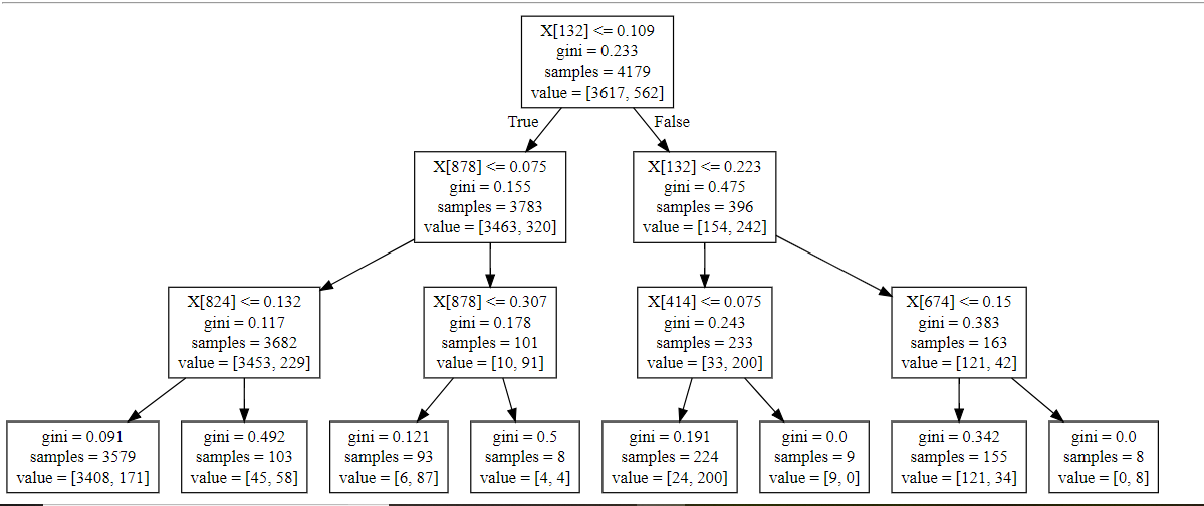

In [20]:
from IPython.display import Image
Image(filename="D:\ML Internship\Gini.png")

In [21]:
# Decision tree classifier with Information gain criterion

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(train_vect, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [22]:
# Doing this to get a visualized graph
with open("clfn_entropy.txt", "w") as f:
    f = tree.export_graphviz(clf_entropy, out_file=f)

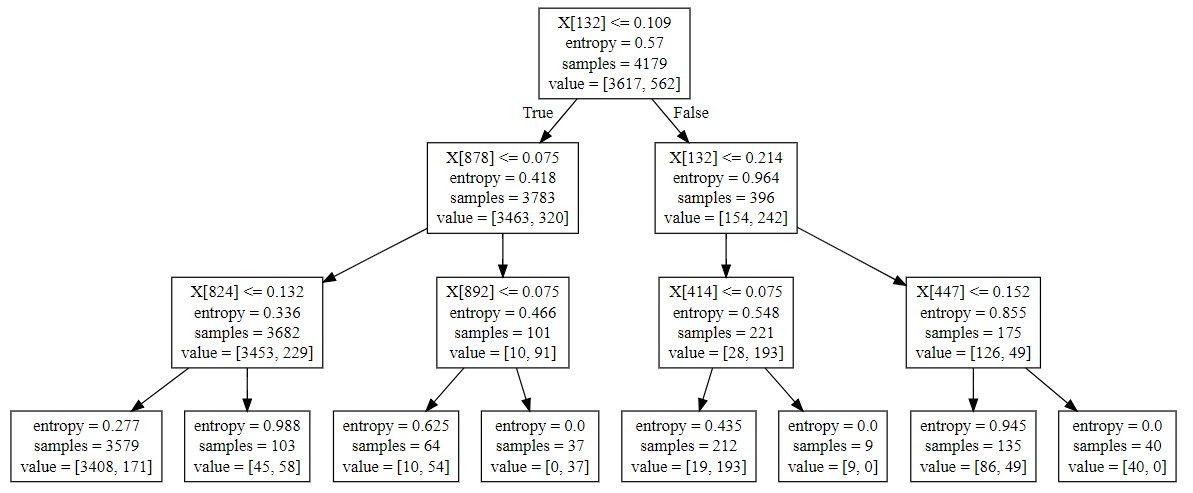

In [23]:
from IPython.display import Image
Image(filename="D:\ML Internship\gain.png")

In [25]:
y_pred = clf_gini.predict(test_vect)

In [26]:
#Predicting with Information Gain
y_pred_en = clf_entropy.predict(test_vect)

In [27]:
#Accuracy for Decision Tree classifier with criterion as gini index
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)*100

92.7494615936827

In [28]:
#Accuracy for Decision Tree classifier with criterion as Information Gain

metrics.accuracy_score(y_test,y_pred_en)*100

92.82124910265614

In [32]:
# Training Random Forest Classifier with scikitlearn
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(train_vect, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
# Making Predictions

y_pred = clf.predict(test_vect)

In [36]:
from sklearn.metrics import accuracy_score
print ("Test Accuracy  :: ", accuracy_score(y_test, y_pred))

Test Accuracy  ::  0.9712849964106246


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1203,    5],
       [  35,  150]], dtype=int64)